In [33]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import linear_model
from sklearn.cross_validation import train_test_split 

## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [34]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


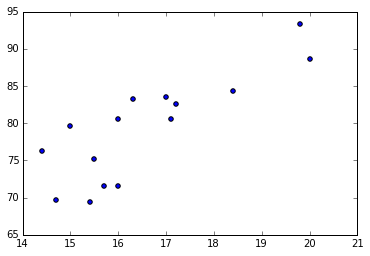

In [35]:
plt.scatter(df['Chirps/Second'], df['Ground Temperature'])
plt.show()

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [36]:
train_input, test_input = train_test_split(df, test_size=.33)
train_input.head()

,Chirps/Second,Ground Temperature
8,15.4,69.4
0,20.0,88.6
3,18.4,84.3
13,17.0,83.5
6,14.7,69.7


In [37]:
train_input1 = train_input[['Chirps/Second','Ground Temperature']]
trainx = train_input[['Ground Temperature']]
trainy = train_input[['Chirps/Second']]

In [38]:
test_input1 = test_input[['Chirps/Second','Ground Temperature']]
testx = test_input[['Ground Temperature']]
testy = test_input[['Chirps/Second']]

In [39]:
regr1 = linear_model.LinearRegression()
regr1.fit(trainx, trainy)
print('Coefficients: ', regr1.coef_)
print(regr1.score(testx, testy))

Coefficients:  [[ 0.21234952]]
0.647114560156


A r**2 value of approximately .64 is not a strong correlation between Chirps per second and Ground Temperature. This is not the most ideal equation for this data but it does show a positive correlation between the two.

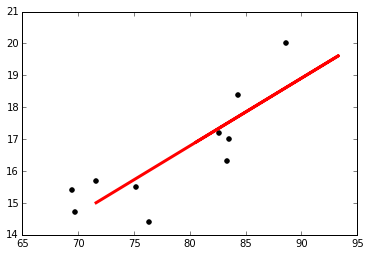

In [40]:
plt.scatter(trainx, trainy, color='black')
plt.plot(testx, regr1.predict(testx), color='red', linewidth=3)
plt.show()

This is for extrapolation.

###Extrapolate data:
If the ground temperature reaches 95 degrees, then the approximate rate at which crickets chirp per second is 20. 


In [41]:
regr1.predict(95)[0]

array([ 19.97438459])

###Interpolate data:
The approximate ground temperature for a cricket that chirps 18 times per second would be 84 degrees.

In [45]:
regr2.predict(18)[0]

array([ 83.56270462])

In [42]:
train_input = train_input[['Chirps/Second','Ground Temperature']]
trainx1 = train_input[['Chirps/Second']]
trainy1 = train_input[['Ground Temperature']]

In [43]:
test_input = test_input[['Chirps/Second','Ground Temperature']]
testx1 = test_input[['Chirps/Second']]
testy1 = test_input[['Ground Temperature']]

In [44]:
regr2 = linear_model.LinearRegression()
regr2.fit(trainx1, trainy1)
print('Coefficients: ', regr2.coef_)
print(regr2.score(testx1, testy1))

Coefficients:  [[ 3.31993806]]
0.619701961053


## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [46]:
brain_body = pd.read_fwf("brain_body.txt")
brain_body.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


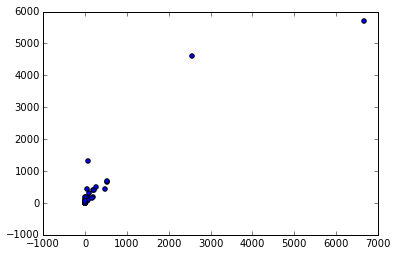

In [47]:
plt.scatter(brain_body['Brain'], brain_body['Body'])
plt.show()

In [48]:
train, test = train_test_split(brain_body, test_size=.33)

train1 = train.loc[:, ['Brain','Body']]
input_train = train[['Brain']]
output_train = train[['Body']]


test1 = test.loc[:, ['Brain','Body']]
input_test = test[['Brain']]
output_test = test[['Body']]
output_test
regr3 = linear_model.LinearRegression()
regr3.fit(input_train, output_train)
print('Coefficients: ', regr3.coef_)
print(regr3.score(input_test, output_test))

Coefficients:  [[ 1.21122741]]
0.830168373187


This equation is a good fit for this data. There is a strong positive correlation between brain weight and body weight. As brain weight increases, body weight increases as well. The r**2 value is .83. 

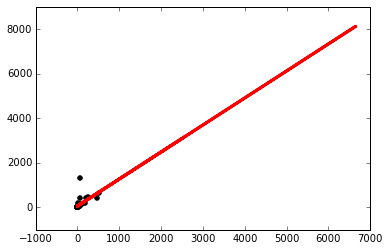

In [49]:
plt.scatter(input_train, output_train, color='black')
plt.plot(input_test, regr3.predict(input_test), color='red', linewidth=3)
plt.show()

In [50]:
regr3.predict(1)[0]

array([ 63.04126538])

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [51]:
salary = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
salary.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [52]:
salary = salary.loc[:, ['Sex','Rank','Year','Degree','YSdeg','Salary']]

salary_input = salary[['Sex','Rank','Year','Degree','YSdeg']]
salary_output = salary[['Salary']]

regr4 = linear_model.LinearRegression()

fit = regr4.fit(salary_input, salary_output)
print('Coefficients: \n', regr4.coef_)
print(regr4.score(salary_input, salary_output))

Coefficients: 
 [[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
   -128.79057354]]
0.854718067441


This equation fits this data set. There is a strong positive correlation between Sex, Rank, Year, Degree, YSdeg, and Salary. The r**2 is .85.

In [53]:
new_salary = salary.loc[:, ['Rank','Year','Salary']]

salary_input1 = salary[['Rank','Year']]
salary_output1 = salary[['Salary']]

regr5 = linear_model.LinearRegression()

fit = regr5.fit(salary_input1, salary_output1)
print('Coefficients: \n', regr5.coef_)
print(regr5.score(salary_input1, salary_output1))

Coefficients: 
 [[ 4731.2563918   376.4992803]]
0.843648093326


I went through 10 trials of different predictor combinations to see which factors would best predict salary. First, Sex was not a factor for determining Salary. Secondly, I found that YSdeg and Degree were also not determining factors for salary. They showed very little change in correlation when they were removed from the analysis. However, the best factors for determining Salary are Rank, Year, and YSdeg. The YSdeg increases the strength of the correlation by approximately .002. In conclusion, the strongest correlation is still Sex, Rank, Year, Degree, YSdeg, and Salary.